step1 manually generate dataset

In [28]:
import numpy as np
X = [ i for i in range(20)]
X = np.reshape(X, (10,2))
print(X)

[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]


In [29]:
# y = X * a + b
y = np.dot(X, [3, 4]) + 2
print(y)

[  6  20  34  48  62  76  90 104 118 132]


In [30]:
y_random = []
for i in y:
    i += np.random.randint(-10, 20)
    y_random.append(i)
print(y_random)

[17, 31, 39, 66, 61, 76, 81, 106, 130, 133]


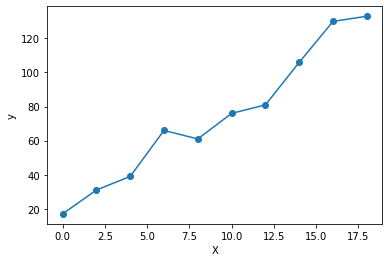

In [31]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], y_random)
plt.plot(X[:, 0], y_random)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Step2 preprocess the data

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X, y_random, test_size=0.2)
print('x_train:')
print(x_train)
print('x_test:')
print(x_test)
print('y_train:')
print(y_train)
print('y_test:')
print(y_test)

x_train:
[[ 6  7]
 [14 15]
 [18 19]
 [ 0  1]
 [12 13]
 [ 4  5]
 [10 11]
 [16 17]]
x_test:
[[2 3]
 [8 9]]
y_train:
[66, 106, 133, 17, 81, 39, 76, 130]
y_test:
[31, 61]


In [76]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_test)

[[-1.37198868 -1.37198868]
 [-0.34299717 -0.34299717]]


Step3 build the model,fit the model and use the model to predict

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [81]:
model.score(x_test,y_test)

0.88234477124183

In [82]:
model.predict(x_test)

array([29.17647059, 68.04411765])

In [85]:
print(model.coef_)
print(model.intercept_)

[18.88628169 18.88628169]
81.0


In [86]:
np.dot(x_test, model.coef_) + model.intercept_

array([29.17647059, 68.04411765])

In [68]:
X_c = np.copy(X)
X_c = np.append(X_c, [[22,np.nan]], axis =0)
X_c = np.insert(X_c, 5, [np.nan, 9.5], axis =0)
print(X_c)

[[ 0.   1. ]
 [ 2.   3. ]
 [ 4.   5. ]
 [ 6.   7. ]
 [ 8.   9. ]
 [ nan  9.5]
 [10.  11. ]
 [12.  13. ]
 [14.  15. ]
 [16.  17. ]
 [18.  19. ]
 [22.   nan]]


In [67]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer()
imp.fit(X_c)
imp.transform(X_c)

array([[ 0.        ,  1.        ],
       [ 2.        ,  3.        ],
       [ 4.        ,  5.        ],
       [ 6.        ,  7.        ],
       [ 8.        ,  9.        ],
       [10.18181818,  9.5       ],
       [10.        , 11.        ],
       [12.        , 13.        ],
       [14.        , 15.        ],
       [16.        , 17.        ],
       [18.        , 19.        ],
       [22.        ,  9.95454545]])

In [73]:
import pandas as pd
df = pd.DataFrame(data=X_c)
# print(df.interpolate())
print(df.dropna())

       0     1
0    0.0   1.0
1    2.0   3.0
2    4.0   5.0
3    6.0   7.0
4    8.0   9.0
6   10.0  11.0
7   12.0  13.0
8   14.0  15.0
9   16.0  17.0
10  18.0  19.0
